In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Chapters 7 & 11 from
# https://www.utstat.toronto.edu/mikevans/jeffrosenthal/
# also
# https://gregorygundersen.com/blog/2020/08/19/bernoulli-beta/
# https://gregorygundersen.com/blog/2019/04/04/bayesian-gaussian/

In [3]:
a = 2
b = 2
def fp(p, data, a = a, b = b):
    N = np.size(data)
    Y = np.sum(data)
    return (Y + a - 1) * np.log(p) + (N + b - Y - 1) * np.log1p(-p)

In [4]:
def metropolis_step(p, logfp, data, stepsize, rng):
    pstar = rng.normal(loc = p, scale = stepsize, size = np.shape(p))
    r = np.minimum(0, logfp(pstar, data) - logfp(p, data))
    u = np.log(rng.uniform())
    if u < r:
        p = pstar
    return p

In [5]:
rng = np.random.default_rng()
M = 10_000
y = rng.binomial(1, 0.75, size = 100)
ps = np.zeros(M)
ps[0] = rng.uniform()
for m in range(1, M):
    ps[m] = metropolis_step(ps[m-1], fp, y, 0.05, rng)

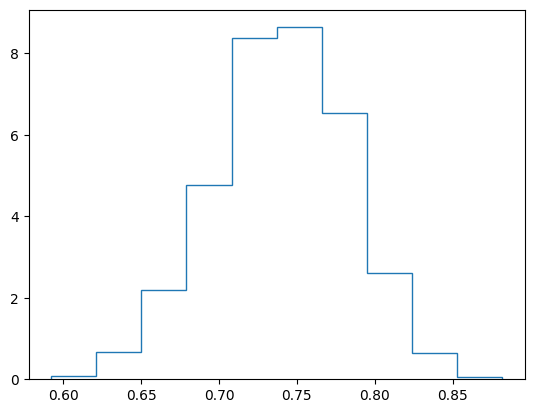

In [6]:
warmup = 500
plt.hist(ps[warmup:], density = True, histtype = "step");

In [7]:
Y = np.sum(y)
N = np.size(y)
B = st.beta(Y + a, N + b - Y)
(B.mean(), np.mean(ps[warmup:]))

(0.7403846153846154, 0.7399864424268539)

In [8]:
(B.std(), np.std(ps[warmup:]))

(0.04278576050247498, 0.04290453948275606)

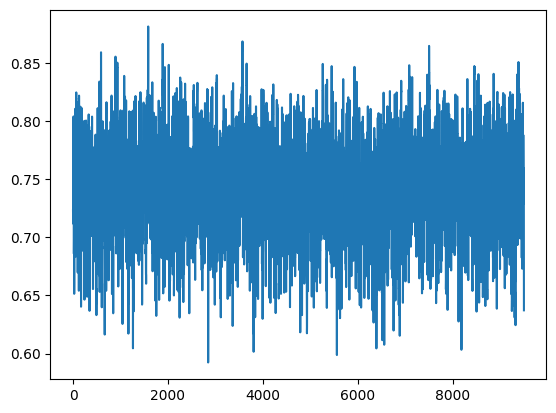

In [9]:
idx = np.arange(M - warmup)
plt.plot(idx, ps[warmup:]); # trace plot

In [13]:
def normal_ll(theta, data):
    m = theta[0]
    s = theta[1]
    return np.sum(st.norm(loc = m, scale = s).logpdf(data))

In [14]:
y = st.norm(loc = 5, scale = 0.1).rvs(size = 501)

In [19]:
rng = np.random.default_rng()
M = 10_000
thetas = np.zeros(shape = (M, 2))
thetas[0] = rng.uniform(size = 2)
for m in range(1, M):
    thetas[m] = metropolis_step(thetas[m-1], normal_ll, y, 0.01, rng)

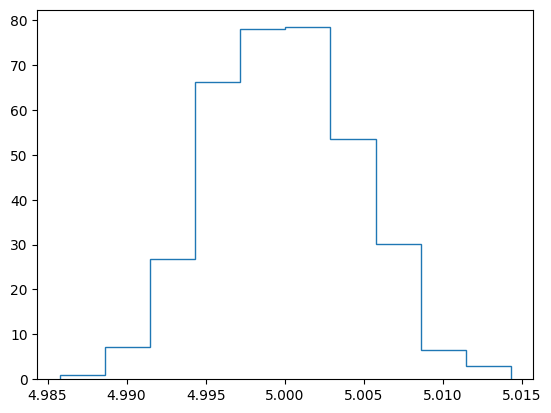

In [25]:
plt.hist(thetas[warmup:, 0], density = True, histtype = "step");

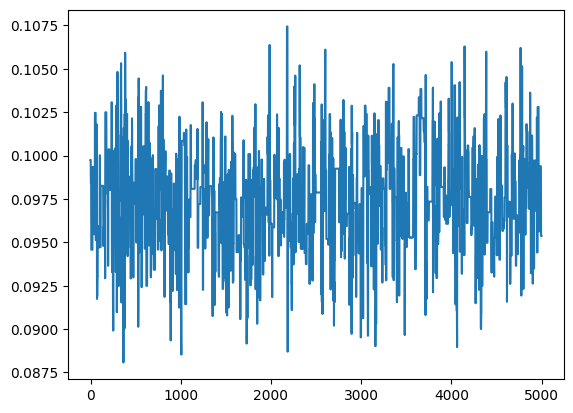

In [26]:
warmup = 5_000
idx = np.arange(M - warmup)
plt.plot(idx, thetas[warmup:, 1]); # trace plot